In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FS_2y_before_Bankruptcy_train.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.9375,0.25454,13.632,3.693,69.389,5.2602,0.8826,0
1,0.639180,0.00000,1.00000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.29059,-0.84313,1.2871,0.12538,?,2.5649,98.95,3.6887,3.8376,0
3,0.119520,0.17679,0.63546,4.5944,117.65,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.11211,0.14752,0.88789,0.0,8.9302,10.287,40.355,9.0448,8.5169,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.45957,0.31602,0.6232,0.16465,7.9274,6.6605,68.502,5.3283,1.315,0


In [3]:
no_na_data = data[np.sum(data == "?", axis = 1)==0]

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [4]:
np.sum(np.sum(no_na_data == "?", axis = 1))

0

In [5]:
no_na_wo_class = no_na_data.iloc[:,:-1].astype("float")

In [6]:
no_na_wo_class.shape

(3334, 64)

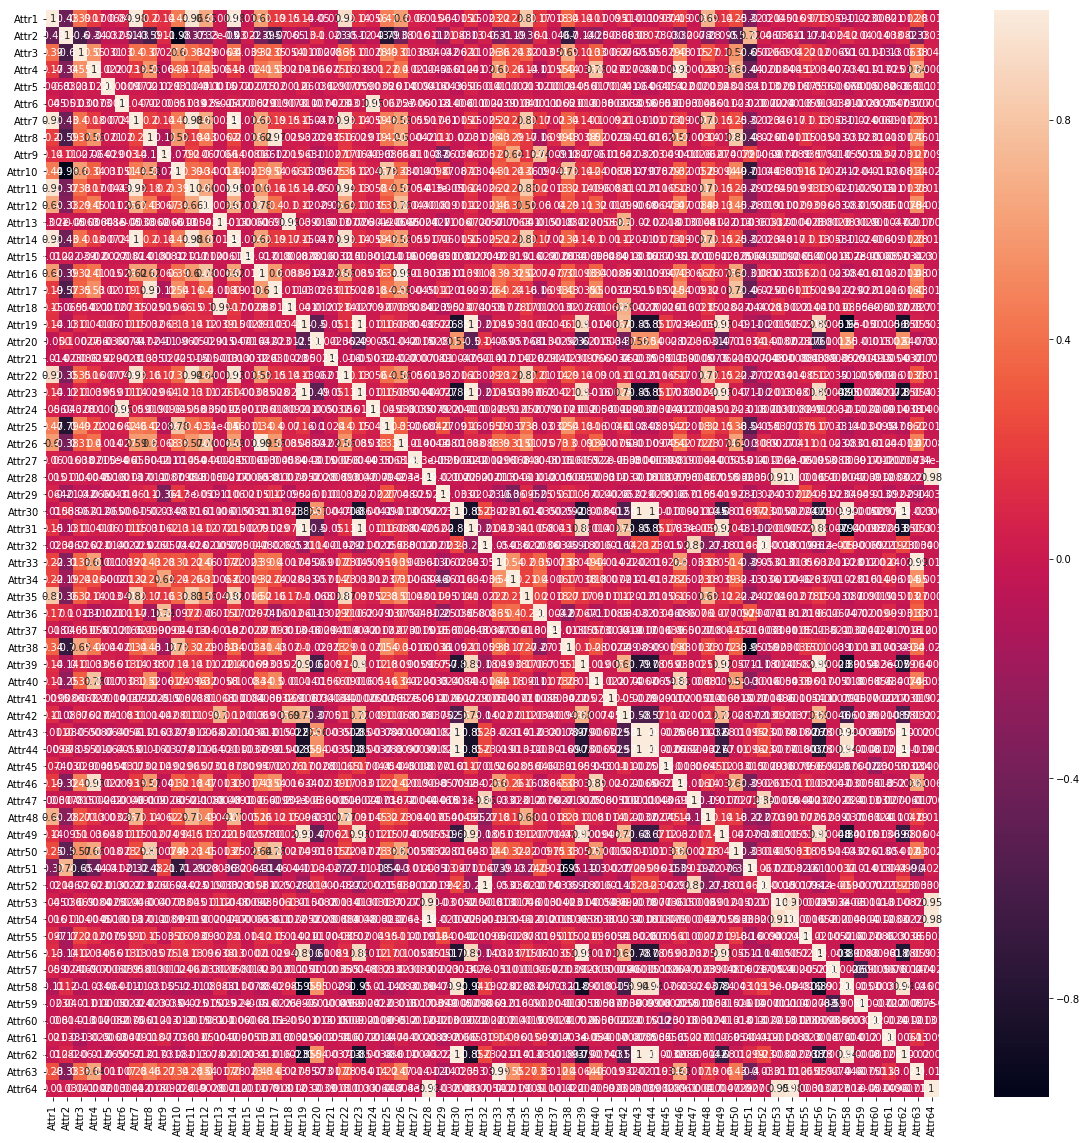

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(no_na_wo_class.corr(), annot=True)

In [8]:
no_na_wo_class.columns[no_na_wo_class.corr()["Attr1"]>=0.7]

Index(['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35'], dtype='object')

In [9]:
for i in range(1, no_na_wo_class.shape[1]+1):
    print("High correlation with Attr", i, "is : ")
    print(list(no_na_wo_class.columns[(no_na_wo_class.corr()["Attr{}".format(i)]>=0.7) |
                                      (no_na_wo_class.corr()["Attr{}".format(i)]<=-0.7)]))

High correlation with Attr 1 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35']
High correlation with Attr 2 is : 
['Attr2', 'Attr10', 'Attr25', 'Attr38', 'Attr51']
High correlation with Attr 3 is : 
['Attr3']
High correlation with Attr 4 is : 
['Attr4', 'Attr40', 'Attr46']
High correlation with Attr 5 is : 
['Attr5']
High correlation with Attr 6 is : 
['Attr6', 'Attr24']
High correlation with Attr 7 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35', 'Attr48']
High correlation with Attr 8 is : 
['Attr8', 'Attr17', 'Attr50']
High correlation with Attr 9 is : 
['Attr9', 'Attr36']
High correlation with Attr 10 is : 
['Attr2', 'Attr10', 'Attr25', 'Attr38', 'Attr51']
High correlation with Attr 11 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35', 'Attr48']
High correlation with Attr 12 is : 
['Attr12', 'Attr16', 'Attr26']
High correlation with Attr 13 is : 
['Attr13', 'Attr18']
High correlation with Attr 14 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14

In [10]:
no_na_wo_class.columns[(no_na_wo_class.corr()["Attr{}".format(1)]>=0.7) | (no_na_wo_class.corr()["Attr{}".format(1)]<=-0.7) ]

Index(['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35'], dtype='object')

In [11]:
no_na_wo_class.corr()["Attr{}".format(1)]>=0.7

Attr1      True
Attr2     False
Attr3     False
Attr4     False
Attr5     False
          ...  
Attr60    False
Attr61    False
Attr62    False
Attr63    False
Attr64    False
Name: Attr1, Length: 64, dtype: bool

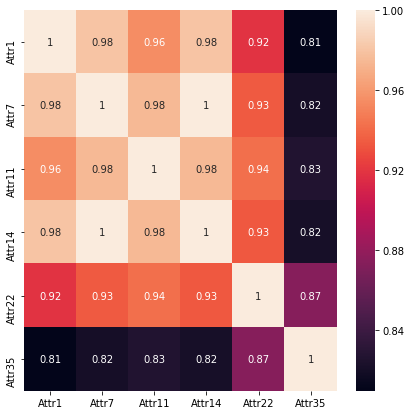

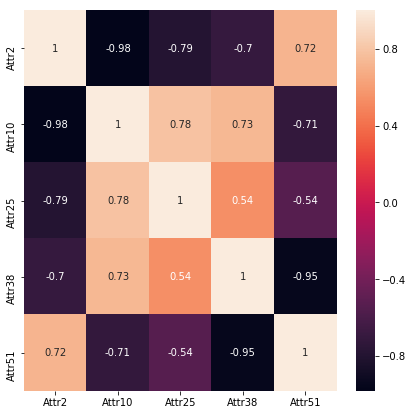

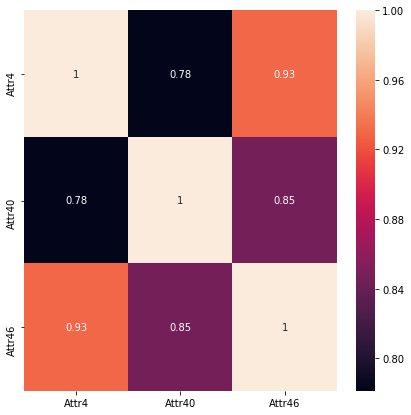

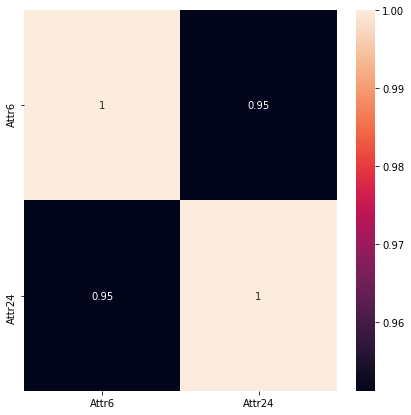

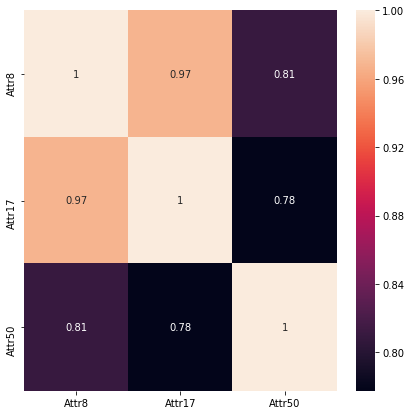

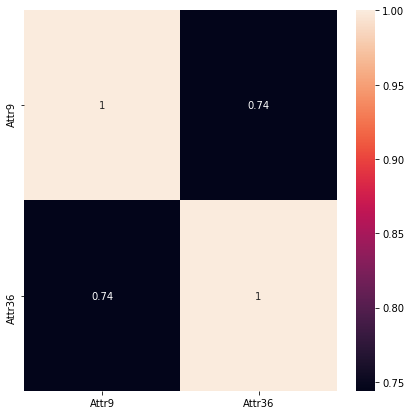

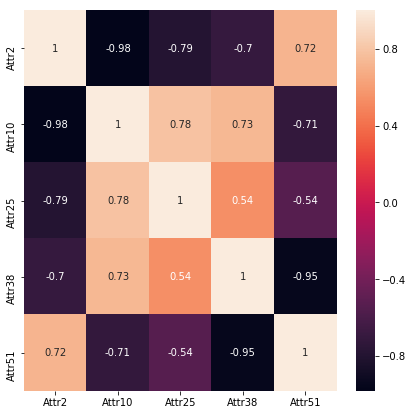

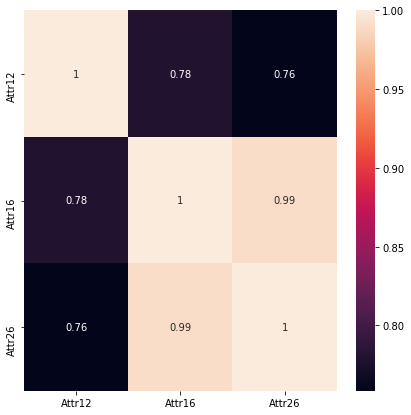

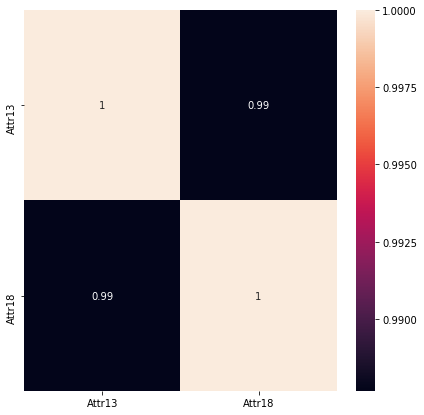

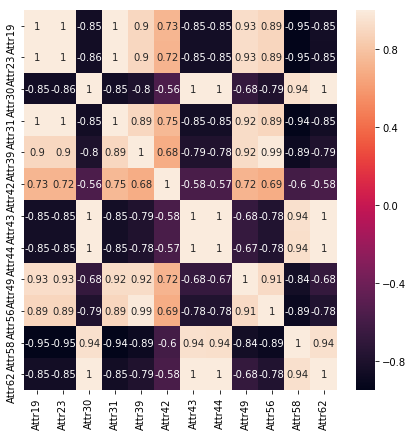

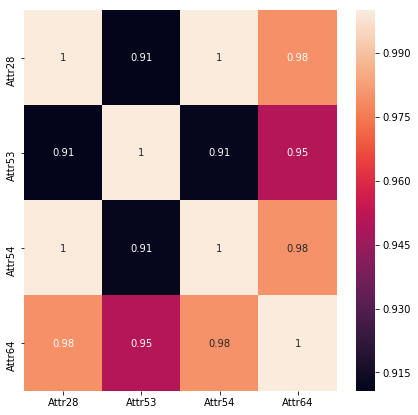

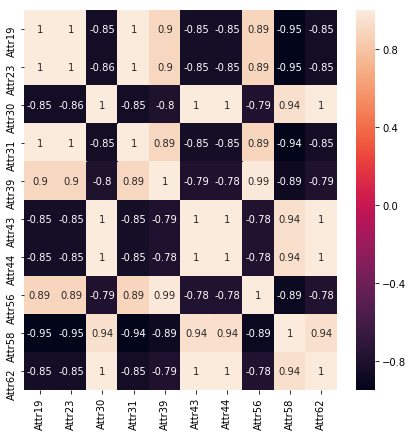

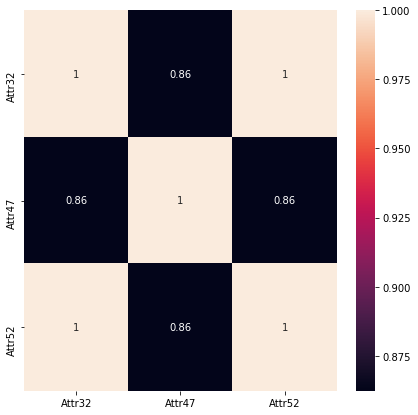

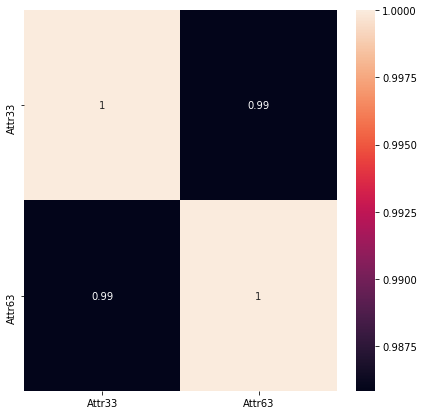

In [12]:
for i in [1,2,4,6,8,9,10,12,13,19,28,30,32,33]:
    idx_list = list(no_na_wo_class.columns[(no_na_wo_class.corr()["Attr{}".format(i)]>=0.7) |
                                      (no_na_wo_class.corr()["Attr{}".format(i)]<=-0.7)])
    f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(7,7))
    sns.heatmap(no_na_wo_class[idx_list].corr(), annot=True)

In [13]:
for i in [1,2,4,6,8,9,10,12,13,19,28,30,32,33]:
    idx_list = list(no_na_wo_class.columns[(no_na_wo_class.corr()["Attr{}".format(i)]>=0.7) |
                                      (no_na_wo_class.corr()["Attr{}".format(1)]<=-0.7)])
    print(no_na_wo_class[idx_list].corr())

           Attr1     Attr7    Attr11    Attr14    Attr22    Attr35
Attr1   1.000000  0.980586  0.955144  0.980486  0.918563  0.809599
Attr7   0.980586  1.000000  0.975239  0.999861  0.933971  0.820502
Attr11  0.955144  0.975239  1.000000  0.975068  0.942268  0.826181
Attr14  0.980486  0.999861  0.975068  1.000000  0.933768  0.821121
Attr22  0.918563  0.933971  0.942268  0.933768  1.000000  0.873813
Attr35  0.809599  0.820502  0.826181  0.821121  0.873813  1.000000
           Attr2    Attr51
Attr2   1.000000  0.716574
Attr51  0.716574  1.000000
           Attr4    Attr40    Attr46
Attr4   1.000000  0.781285  0.930227
Attr40  0.781285  1.000000  0.846594
Attr46  0.930227  0.846594  1.000000
           Attr6    Attr24
Attr6   1.000000  0.951197
Attr24  0.951197  1.000000
          Attr8    Attr17    Attr50
Attr8   1.00000  0.968260  0.810240
Attr17  0.96826  1.000000  0.777519
Attr50  0.81024  0.777519  1.000000
           Attr9    Attr36
Attr9   1.000000  0.744004
Attr36  0.744004  1.000

## 37번 변수를 제거한다면

In [14]:
no37_data = data.drop(["Attr37","class"], axis = 1)

In [15]:
no37_data.shape

(6855, 63)

In [16]:
no_37na_data = no37_data[np.sum(no37_data == "?", axis = 1)==0].astype("float")

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [17]:
no_37na_data.shape

(5652, 63)

In [18]:
for i in range(1, no_37na_data.shape[1]+1):
    if i <= 36:
        print("High correlation with Attr", i, "is : ")
        print(list(no_37na_data.columns[(no_37na_data.corr()["Attr{}".format(i)]>=0.7) | 
                                        (no_37na_data.corr()["Attr{}".format(i)]<=-0.7)]))
    else:
        print("High correlation with Attr", i+1, "is : ")
        print(list(no_37na_data.columns[(no_37na_data.corr()["Attr{}".format(i+1)]>=0.7) | 
                                        (no_37na_data.corr()["Attr{}".format(i+1)]<=-0.7)]))

High correlation with Attr 1 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35']
High correlation with Attr 2 is : 
['Attr2', 'Attr3', 'Attr10', 'Attr25', 'Attr38', 'Attr51']
High correlation with Attr 3 is : 
['Attr2', 'Attr3', 'Attr10', 'Attr38', 'Attr51']
High correlation with Attr 4 is : 
['Attr4', 'Attr40', 'Attr46', 'Attr50']
High correlation with Attr 5 is : 
['Attr5']
High correlation with Attr 6 is : 
['Attr6', 'Attr24']
High correlation with Attr 7 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35', 'Attr48']
High correlation with Attr 8 is : 
['Attr8', 'Attr17', 'Attr50']
High correlation with Attr 9 is : 
['Attr9', 'Attr36']
High correlation with Attr 10 is : 
['Attr2', 'Attr3', 'Attr10', 'Attr25', 'Attr38', 'Attr51']
High correlation with Attr 11 is : 
['Attr1', 'Attr7', 'Attr11', 'Attr14', 'Attr22', 'Attr35', 'Attr48']
High correlation with Attr 12 is : 
['Attr12', 'Attr16', 'Attr26']
High correlation with Attr 13 is : 
['Attr13', 'Attr18']
High 

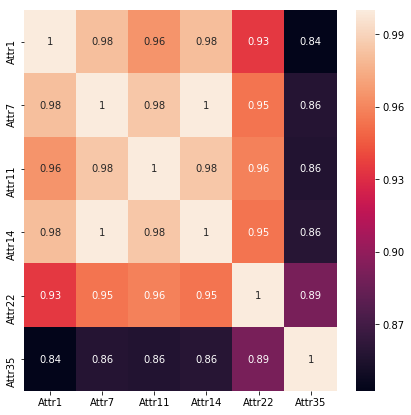

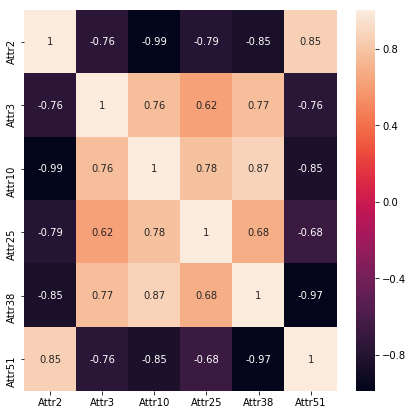

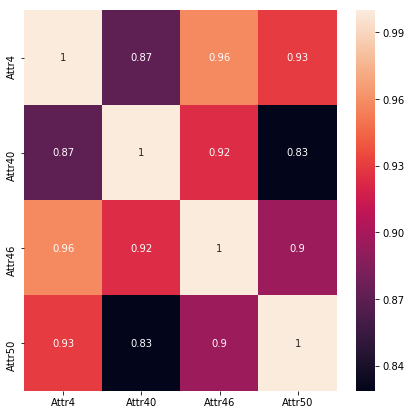

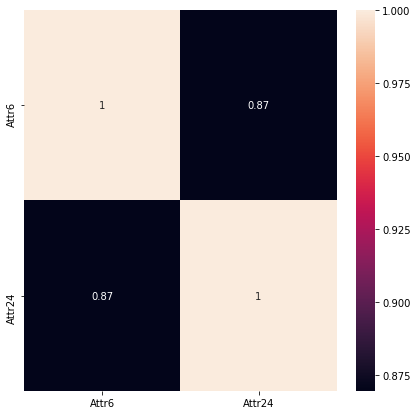

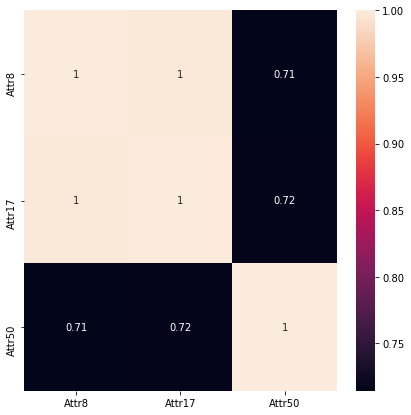

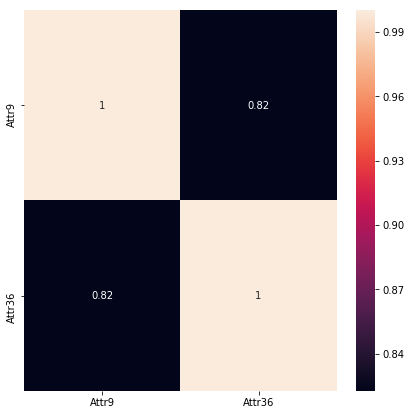

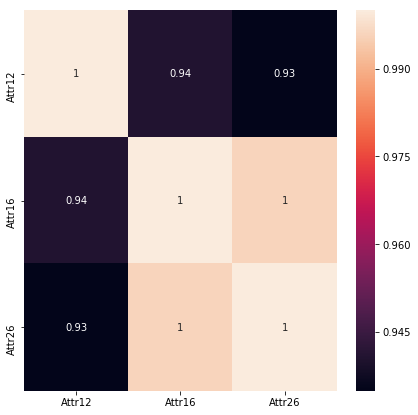

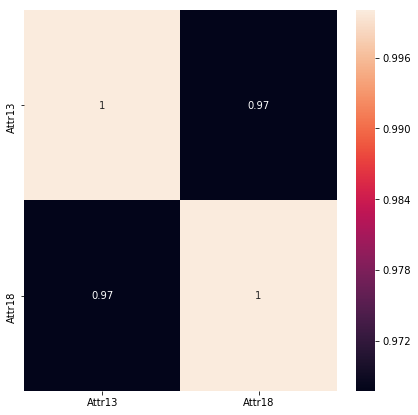

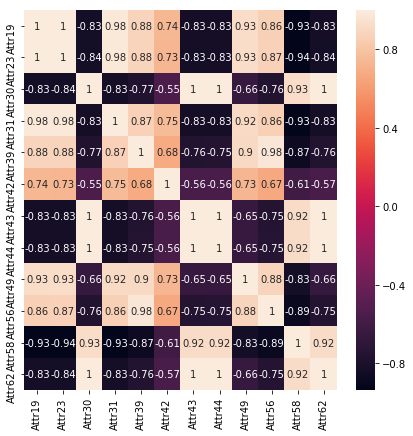

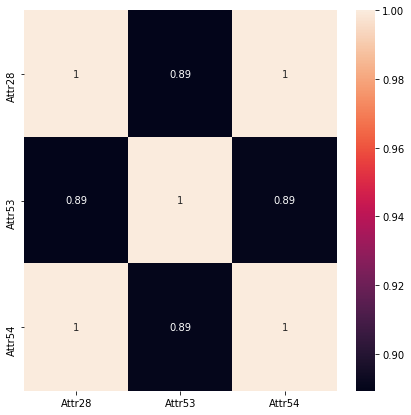

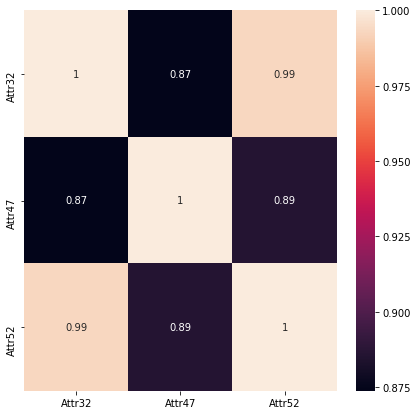

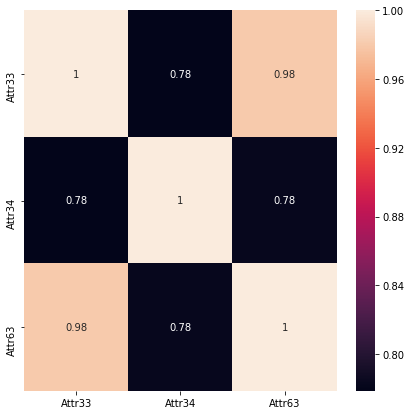

In [19]:
for i in [1,2,4,6,8,9, 12,13,19,28, 32,33]:
    idx_list = list(no_37na_data.columns[(no_37na_data.corr()["Attr{}".format(i)]>=0.7) |
                                      (no_37na_data.corr()["Attr{}".format(i)]<=-0.7)])
    f, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(7,7))
    sns.heatmap(no_37na_data[idx_list].corr(), annot=True)

(no_37na_data.corr()["Attr{}".format(2)]>=0.7)

## OUTLIER

In [22]:
x = [0]
for i in range(data.shape[1] - 1):
    x.append(data.iloc[:, i])
    
print(len(x))

65


In [23]:
x[37] = None

In [24]:
for i in range(1,len(x)):
    if i != 37:
        if (np.sum(x[i]=="?"))!=0:
            x[i] = x[i][x[i] != "?"].astype("float64")

In [25]:
np.sum(x=="?")

0

In [26]:
from scipy.stats import iqr

In [27]:
def detect_outlier(feature_num, weight, lst) :
    iqrr = iqr(lst[feature_num])
    q1 = np.percentile(lst[feature_num], 25)
    q3 = np.percentile(lst[feature_num], 75)
    outliers = lst[feature_num][(lst[feature_num] < q1-iqrr * weight) | (lst[feature_num] > q3+ iqrr * weight)]
    
    print("\n\n---------",lst[feature_num].name,"---------")
    print("Outliers with weight {} :\n'".format(weight))
    print(outliers)
    print("# of Outliers : ", len(outliers))
    
    return outliers

In [28]:
outliers= []

for i in range(1, len(x)):
    if i==37:
        pass
    else:
        outliers.append(detect_outlier(i, 3, x))



--------- Attr1 ---------
Outliers with weight 3 :
'
1       0.63918
2      -0.44076
17     -0.41218
22     -1.05610
25     -1.50340
         ...   
6774   -0.44403
6792    0.47622
6796   -0.77944
6814    0.90101
6847    0.57013
Name: Attr1, Length: 309, dtype: float64
# of Outliers :  309


--------- Attr2 ---------
Outliers with weight 3 :
'
17      2.3649
166     3.6519
223     2.6717
299     3.1350
423     4.1335
         ...  
6304    2.8952
6334    2.5199
6561    2.1915
6679    3.7612
6796    2.3112
Name: Attr2, Length: 92, dtype: float64
# of Outliers :  92


--------- Attr3 ---------
Outliers with weight 3 :
'
166    -2.6859
288    -1.5132
299    -2.4839
423    -3.1335
472    -1.1727
         ...  
6237   -2.4809
6304   -2.3620
6334   -1.5517
6561   -1.2953
6679   -3.0242
Name: Attr3, Length: 69, dtype: float64
# of Outliers :  69


--------- Attr4 ---------
Outliers with weight 3 :
'
24      18.2710
40       9.7639
44      12.0740
62      12.7900
85      20.6350
         ...

Name: Attr33, Length: 266, dtype: float64
# of Outliers :  266


--------- Attr34 ---------
Outliers with weight 3 :
'
24      30.394
41      17.912
62      25.103
141    -22.244
359     27.977
         ...  
6775    28.602
6785    37.951
6790    32.629
6818    22.458
6838    18.134
Name: Attr34, Length: 242, dtype: float64
# of Outliers :  242


--------- Attr35 ---------
Outliers with weight 3 :
'
1       0.76040
2      -0.44130
22     -0.92076
25     -1.17730
148    -0.42640
         ...   
6741    0.51593
6774   -0.41983
6796   -0.71979
6814    0.80022
6847    0.59076
Name: Attr35, Length: 265, dtype: float64
# of Outliers :  265


--------- Attr36 ---------
Outliers with weight 3 :
'
25       10.2080
41       15.8800
166       6.3137
197       6.0168
282      17.8370
          ...   
6666    101.8700
6727      8.6337
6749      9.5615
6772      6.1504
6814      7.4832
Name: Attr36, Length: 135, dtype: float64
# of Outliers :  135


--------- Attr38 ---------
Outliers with weight 3 

In [29]:
bankrupted_x = data[data["class"] == 1]
not_bankrupted_x = data[data["class"] == 0]

In [30]:
b_x = [0]
for i in range(bankrupted_x.shape[1] - 1):
    b_x.append(bankrupted_x.iloc[:, i])
    
print(len(b_x))

nb_x = [0]
for i in range(not_bankrupted_x.shape[1] - 1):
    nb_x.append(not_bankrupted_x.iloc[:, i])
    
print(len(nb_x))

65
65


In [31]:
b_x[37] = None
nb_x[37] = None

In [32]:
for i in range(1,len(b_x)):
    if i != 37:
        b_x[i] = b_x[i][b_x[i] != "?"].astype("float64")
        nb_x[i] = nb_x[i][nb_x[i] != "?"].astype("float64")

In [33]:
print(np.sum(b_x[i] == "?"))
print(np.sum(nb_x[i] == "?"))

0
0


In [34]:
b_x

[0, 11      0.056009
 37     -0.141260
 41      0.194230
 48      0.023534
 53      0.044259
           ...   
 6786    0.139150
 6788    0.093071
 6810    0.022064
 6824    0.005747
 6853    0.108750
 Name: Attr1, Length: 361, dtype: float64, 11      0.48351
 37      0.77697
 41      0.87119
 48      0.86834
 53      0.33913
          ...   
 6786    0.42335
 6788    0.18123
 6810    0.44644
 6824    0.66821
 6853    0.46977
 Name: Attr2, Length: 361, dtype: float64, 11      0.047054
 37     -0.056180
 41      0.128810
 48     -0.079186
 53      0.242930
           ...   
 6786    0.535160
 6788    0.451690
 6810    0.435630
 6824    0.238740
 6853    0.202730
 Name: Attr3, Length: 361, dtype: float64, 11      1.10050
 37      0.92769
 41      1.14790
 48      0.90778
 53      1.71630
          ...   
 6786    2.26410
 6788    3.49240
 6810    1.97580
 6824    1.72330
 6853    1.57520
 Name: Attr4, Length: 360, dtype: float64, 11     -30.8950
 37     -50.2950
 41       2.9725
 48     

## Bankrupted

In [35]:
outliers= []

for i in range(1, len(x)):
    if i==37:
        pass
    else:
        outliers.append(detect_outlier(i, 3, b_x))



--------- Attr1 ---------
Outliers with weight 3 :
'
503     9.80370
559    -1.21190
680    -2.16200
727    -2.43650
969     0.72021
1142   -0.87482
3823   -4.05060
4681   -1.28810
5392   -1.72150
5724   -0.85923
5743    0.77841
5769   -0.81502
6666   -0.70901
Name: Attr1, dtype: float64
# of Outliers :  13


--------- Attr2 ---------
Outliers with weight 3 :
'
606      2.8892
680      2.7584
727      2.4538
1640     3.5019
1676     2.6969
1777     2.2765
1905     2.4964
2758     2.6512
3539     2.7162
3823     6.5306
4681     2.1907
4694     2.5058
5313    40.1570
5445     2.5849
5659     3.2389
5915     2.3317
6053     2.6924
6237     3.4809
6304     2.8952
Name: Attr2, dtype: float64
# of Outliers :  19


--------- Attr3 ---------
Outliers with weight 3 :
'
606    -2.4228
680    -1.8297
1777   -1.8537
2590   -1.6619
2758   -2.5901
3823   -5.4671
4681   -1.6888
4694   -2.1529
4840   -1.6147
5445   -2.0108
5659   -3.0615
6053   -2.1274
6237   -2.4809
6304   -2.3620
Name: Attr3, dtyp



--------- Attr40 ---------
Outliers with weight 3 :
'
227      11.41400
559       1.12640
566       9.31040
875      10.59600
969       3.21340
1080      1.21280
1091      1.23590
1155      4.65600
1375      1.36740
1750      1.78400
1894      0.82003
1898      0.92093
1987      1.28750
2141      2.25860
2165     11.83200
2190      1.45780
2313      1.40590
2386      1.44460
2682      0.94860
2694     56.67900
2949      1.50340
3151      0.85406
3193      3.00930
3218      7.16790
4226      1.69110
4265      3.27480
4444      1.25190
4550      1.07420
4825      8.72990
4922     13.28100
5140      3.81230
5149      1.67240
5159      1.54770
5313      3.89870
5315     50.79200
5566      4.79620
5743      1.68450
5769      1.17630
5985      0.97345
6156      1.75820
6177      5.61060
6367      1.02660
6731    211.91000
6786      0.89557
6788      0.93562
Name: Attr40, dtype: float64
# of Outliers :  45


--------- Attr41 ---------
Outliers with weight 3 :
'
443      2.5512
798     -3.04



--------- Attr62 ---------
Outliers with weight 3 :
'
1103      1753.50
1375      5373.40
1458    164660.00
1667       911.28
1754       932.09
1777       941.98
1987      3429.00
2012      2740.30
2492       739.21
2758      5240.90
2893       774.29
3005       750.75
3229       648.55
3432      3009.50
3539       674.61
3887      7422.90
4694       858.70
4699    146380.00
4825       702.44
5185      1471.40
5325      1069.80
5659     29272.00
5743      1480.30
5890       702.48
5985      1597.20
6032      1399.60
6237     36812.00
6268     11966.00
6304       827.40
6396       613.51
6615       644.83
Name: Attr62, dtype: float64
# of Outliers :  31


--------- Attr63 ---------
Outliers with weight 3 :
'
41       17.724
227      21.298
605      18.584
875      68.628
1750     18.783
2165     25.614
2313     17.508
2694     67.141
3193     20.879
3198     35.533
4226     58.476
4922     41.880
5140     21.783
5149    150.930
5159     32.494
5315     29.733
5566     41.282
6177    1

## Not Bankrupted

In [36]:
outliers= []

for i in range(1, len(x)):
    if i==37:
        pass
    else:
        outliers.append(detect_outlier(i, 3, nb_x))



--------- Attr1 ---------
Outliers with weight 3 :
'
1       0.63918
2      -0.44076
17     -0.41218
22     -1.05610
25     -1.50340
         ...   
6774   -0.44403
6792    0.47622
6796   -0.77944
6814    0.90101
6847    0.57013
Name: Attr1, Length: 261, dtype: float64
# of Outliers :  261


--------- Attr2 ---------
Outliers with weight 3 :
'
17      2.3649
166     3.6519
223     2.6717
299     3.1350
423     4.1335
         ...  
6209    2.1497
6334    2.5199
6561    2.1915
6679    3.7612
6796    2.3112
Name: Attr2, Length: 72, dtype: float64
# of Outliers :  72


--------- Attr3 ---------
Outliers with weight 3 :
'
166     -2.6859
288     -1.5132
299     -2.4839
423     -3.1335
472     -1.1727
601     -1.5972
1028    -3.4418
1076    -1.9383
1124    -1.5530
1130    -1.7818
1151    -2.6399
1194    -1.8645
1268    -1.5572
1502    -1.3418
1523    -2.6289
1565    -1.1977
1641    -2.1026
1756   -13.4000
2333   -10.5300
2527    -1.2895
2586     9.6307
3121    -1.2992
3216    -1.5415
3413



--------- Attr33 ---------
Outliers with weight 3 :
'
24      30.394
62      25.103
85      49.448
95      23.961
171     29.651
         ...  
6775    28.602
6785    37.951
6790    32.629
6818    22.458
6819    24.481
Name: Attr33, Length: 241, dtype: float64
# of Outliers :  241


--------- Attr34 ---------
Outliers with weight 3 :
'
24      30.394
62      25.103
141    -22.244
359     27.977
437     23.588
         ...  
6775    28.602
6785    37.951
6790    32.629
6818    22.458
6838    18.134
Name: Attr34, Length: 226, dtype: float64
# of Outliers :  226


--------- Attr35 ---------
Outliers with weight 3 :
'
1       0.76040
2      -0.44130
22     -0.92076
25     -1.17730
148    -0.42640
         ...   
6741    0.51593
6774   -0.41983
6796   -0.71979
6814    0.80022
6847    0.59076
Name: Attr35, Length: 218, dtype: float64
# of Outliers :  218


--------- Attr36 ---------
Outliers with weight 3 :
'
25      10.2080
166      6.3137
197      6.0168
282     17.8370
327      6.4103
 

## IMPUTED DATA

In [37]:
imp_sltd_data = pd.read_csv("imputed_data.csv")
imp_sltd_data.drop("X1", axis = 1, inplace=True)
imp_sltd_data.head()

,Attr1,Attr5,Attr6,Attr9,Attr10,Attr15,Attr17,Attr18,Attr19,Attr20,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,-0.024558,34.382,-0.026711,1.06670,0.67673,6342.50,3.32760,-0.020067,-0.029744,26.775,...,28.560,1.1106,3937.6000,-0.036289,0.25454,13.6320,3.6930,5.2602,0.8826,0
1,0.639180,29.678,-1.139300,1.11850,1.00000,0.00,0.84934,0.760520,0.679940,0.000,...,0.000,11.1240,16.6650,0.639180,0.00000,178.4700,37.8860,7.6319,21.7920,0
2,-0.440760,34.555,0.000000,1.51860,0.52277,-476.47,2.09540,-0.440760,-0.290240,0.000,...,0.000,1.4867,180.9100,-0.843130,0.12538,13.9380,2.5649,3.6887,3.8376,0
3,0.119520,117.650,0.251540,1.12630,0.81017,306.88,5.65630,0.148750,0.093023,40.872,...,46.033,4.3151,180570.0000,0.147520,0.00000,8.9302,10.2870,9.0448,8.5169,0
4,0.230400,-26.928,0.617540,0.80411,0.72905,315.23,3.69070,0.282690,0.351560,46.043,...,70.950,1.3886,2.5745,0.316020,0.16465,7.9274,6.6605,5.3283,1.3150,0


In [38]:
imp_bankrupted_x = imp_sltd_data[imp_sltd_data["class"] == 1]
imp_not_bankrupted_x = imp_sltd_data[imp_sltd_data["class"] == 0]

In [39]:
imp_b_x = [0]
for i in range(imp_bankrupted_x.shape[1] - 1):
    imp_b_x.append(imp_bankrupted_x.iloc[:, i])
    
print(len(imp_b_x))

imp_nb_x = [0]
for i in range(imp_not_bankrupted_x.shape[1] - 1):
    imp_nb_x.append(imp_not_bankrupted_x.iloc[:, i])
    
print(len(imp_nb_x))

28
28


In [40]:
for i in range(1,len(imp_b_x)):
    imp_b_x[i] = imp_b_x[i][~imp_b_x[i].isna()].astype("float64")
    imp_nb_x[i] = imp_nb_x[i][~imp_nb_x[i].isna()].astype("float64")

In [41]:
for i in range(1, len(imp_b_x)):
    detect_outlier(i, 10, imp_b_x)



--------- Attr1 ---------
Outliers with weight 10 :
'
503     9.8037
680    -2.1620
727    -2.4365
3823   -4.0506
Name: Attr1, dtype: float64
# of Outliers :  4


--------- Attr5 ---------
Outliers with weight 10 :
'
1103    -1211.2
1375     2067.7
1640     8197.1
1987     4725.6
2758   -10505.0
3062     7663.6
3432    -2465.6
3887    -6320.0
4699    -2540.6
4825     6582.9
5659   -10382.0
6032    -1350.4
6237    -4868.6
6268    -2792.3
6731     1341.6
Name: Attr5, dtype: float64
# of Outliers :  15


--------- Attr6 ---------
Outliers with weight 10 :
'
605     -1.6485
606     -4.0195
727     -2.3228
1009    -4.0432
1640    -2.8911
2590    -3.0929
2758    -1.7201
3198    -2.4102
3539    -3.2576
3823   -13.2450
5313   -46.8730
5392    -1.7215
5445    -1.8968
5659    -3.6393
5769    -2.0621
5890    -1.8937
6053    -2.0022
6237    -6.5649
Name: Attr6, dtype: float64
# of Outliers :  18


--------- Attr9 ---------
Outliers with weight 10 :
'
41      15.441
6666    96.058
Name: Attr9, dt

Name: Attr64, dtype: float64
# of Outliers :  22


In [42]:
for i in range(1, len(imp_nb_x)):
    detect_outlier(i, 10, imp_nb_x)



--------- Attr1 ---------
Outliers with weight 10 :
'
25      -1.5034
423    -12.4580
667     -1.3415
930     -1.6504
1026    -1.2636
1124    -1.2013
2036    -1.5233
2150     2.6476
2333    -3.7231
2519     1.2757
2736    -1.7464
3008     1.4862
3802    -4.2407
3809    -1.4286
3891     1.8422
3893     1.3774
3982     3.1233
3988    -1.9388
4761    -1.2948
5030     1.2815
5416    -1.9480
5553    -1.1938
5652     2.9771
5971    -1.3743
6665    -1.2496
Name: Attr1, dtype: float64
# of Outliers :  25


--------- Attr5 ---------
Outliers with weight 10 :
'
34     -48327.0
45     -10423.0
49      -7402.2
65      -1360.2
141      1628.3
         ...   
6717     3648.4
6719     3571.9
6779    -2314.6
6783    -2317.8
6800    16263.0
Name: Attr5, Length: 310, dtype: float64
# of Outliers :  310


--------- Attr6 ---------
Outliers with weight 10 :
'
1      -1.13930
17     -1.07400
25     -0.86512
75      1.02900
166    -2.11050
         ...   
6640   -0.87741
6664   -1.02640
6665   -1.82330
66